# Trabalho 01 - Data Science em Marketing
- Davi Alexandre
- Mila Mendes
- Tales Pinho
- Tom Del Negro

## 1. Introdução

Neste projeto, vamos aplicar técnicas de Data Science para resolver um problema de uma rede de varejo.

Com base nos dados fornecidos pela empresa (transações, perfis de clientes e desempenho de campanhas anteriores), nosso desafio é:

> Gerar insights valiosos para **aumentar o retorno sobre investimento (ROI)**, **melhorar a retenção de clientes** e **personalizar campanhas de forma estratégica**.

### Técnicas que serão utilizadas


- **Cluster Analysis**: agrupar clientes com base em comportamento de compra.
- **Conjoint Analysis**: entender quais atributos de campanha são mais valorizados.
- **Regressão Linear**: prever impacto das campanhas no gasto dos clientes.
- **Customer Lifetime Value (CLV)**: calcular o valor total de cada cliente ao longo do tempo.
---

## 2. Leitura e Visualização dos Dados

Nesta etapa, vamos carregar os arquivos CSV com os dados da empresa.

Utilizaremos bibliotecas como `pandas` para leitura e organização dos dados e `seaborn` e `matplotlib` para visualização.

Os arquivos que vamos carregar são:
- `clientes.csv`: contém informações demográficas e de comportamento dos clientes.
- `transacoes.csv`: registra todas as compras realizadas pelos clientes.
- `campanhas.csv`: contém os dados sobre campanhas de marketing realizadas.

Vamos iniciar subindo os arquivos e analisando as primeiras linhas de cada um.


In [2]:
# Primeiro: importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")

# Etapa para upload dos arquivos (executa e sobe os CSVs no Colab)
from google.colab import files
uploaded = files.upload()  # Aparecerá um botão para enviar os arquivos do seu computador

# Agora, vamos carregar os arquivos e salvar em variáveis
clientes = pd.read_csv("clientes.csv")
transacoes = pd.read_csv("transacoes.csv")  # renomeie se estiver diferente
campanhas = pd.read_csv("campanhas.csv")

# Visualizar as primeiras linhas de cada tabela
print(" Dados dos Clientes:")
display(clientes.head())

print("\n Transações realizadas:")
display(transacoes.head())

print("\n Campanhas de marketing:")
display(campanhas.head())


Saving clientes.csv to clientes.csv
Saving transacoes.csv to transacoes.csv
Saving campanhas.csv to campanhas.csv
📦 Dados dos Clientes:


,cliente_id,idade,renda_mensal,cidade,tipo_cliente,ultima_compra,frequencia_compras,total_gasto
0,1,56,2590,Curitiba,ocasional,63,12,6779
1,2,69,5305,Manaus,frequente,104,4,7310
2,3,46,3865,Porto Alegre,frequente,339,8,4170
3,4,32,2866,Porto Alegre,ocasional,359,7,4619
4,5,60,4030,Porto Alegre,premium,156,7,3869



🛒 Transações realizadas:


,transacao_id,cliente_id,data_compra,valor_compra,meio_pagamento,campanha
0,1,398,2022-01-01,161,cartão,sem_campanha
1,2,583,2022-01-02,116,boleto,sem_campanha
2,3,726,2022-01-03,173,cartão,dia_pais
3,4,435,2022-01-04,148,cartão,volta_as_aulas
4,5,577,2022-01-05,21,cartão,dia_pais



📢 Campanhas de marketing:


,campanha_id,nome_campanha,custo_campanha,alcance,conversao
0,1,black_friday,16361,3245,497
1,2,natal,9721,1242,442
2,3,dia_maes,12684,4650,264
3,4,dia_pais,12198,3033,64
4,5,volta_as_aulas,13136,2337,196


### Interpretação Inicial dos Dados

- A tabela `clientes` mostra o perfil de cada cliente, incluindo idade, renda mensal, cidade, tipo de cliente e comportamento de compra.
- A tabela `transacoes` registra cada compra, incluindo data, valor, forma de pagamento e qual campanha influenciou.
- A tabela `campanhas` mostra os resultados de cada campanha, como custo, alcance e conversão.

Essas tabelas juntas nos permitirão cruzar dados para:
- Agrupar clientes por comportamento (Cluster Analysis)
- Avaliar o impacto das campanhas (Regressão Linear)
- Calcular o valor de vida do cliente (CLV)
- E entender preferências de campanhas (Conjoint Analysis)


## 3. Cluster Analysis.

### Variáveis que vamos usar para agrupar os clientes:
- `frequencia_compras`: quantas vezes o cliente comprou
- `total_gasto`: quanto ele gastou no total
- `ultima_compra`: dias desde a última compra
- `renda_mensal`: faixa de renda do cliente
- `idade`: idade do cliente

Com base nisso, vamos identificar grupos como:
- Cliente Premium
- Cliente Econômico
- Cliente Inativo
- Cliente Frequente


In [3]:
# Importar bibliotecas necessárias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1️ Selecionar mais variáveis
variaveis = ['frequencia_compras', 'total_gasto', 'ultima_compra', 'renda_mensal', 'idade']
dados_cluster = clientes[variaveis]

# 2️ Normalizar os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_cluster)

# 3️ Rodar o KMeans com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clientes['cluster'] = kmeans.fit_predict(dados_normalizados)

# 4️ Ver características médias de cada cluster
perfil_clusters = clientes.groupby('cluster')[variaveis].mean().round(1)
display(perfil_clusters)


,frequencia_compras,total_gasto,ultima_compra,renda_mensal,idade
cluster,,,,,
0,7.8,4938.1,210.9,5414.5,57.7
1,10.5,5321.5,289.8,5023.2,33.8
2,13.2,5511.7,108.5,5044.6,49.9
3,8.9,3995.1,111.7,4811.2,32.6


In [4]:
# Criar uma função para nomear os clusters com nomes reais e descritivos

# "def" serve para criar uma função em Python.
# Aqui, a função recebe uma "linha" da tabela clientes (cada linha é um cliente).

def nomear_cluster(linha):

    # if = SE o cluster for 0, retorne o nome "Cliente Econômico"
    if linha['cluster'] == 0:
        return 'Cliente Econômico'

    # elif = SENÃO SE for o cluster 1, retorne "Cliente Inativo"
    elif linha['cluster'] == 1:
        return 'Cliente Inativo'

    # elif = SENÃO SE for o cluster 2, retorne "Cliente Premium"
    elif linha['cluster'] == 2:
        return 'Cliente Premium'

    # elif = SENÃO SE for o cluster 3, retorne "Cliente Frequente"
    elif linha['cluster'] == 3:
        return 'Cliente Frequente'

# Agora vamos aplicar essa função em todas as linhas da tabela clientes
# A função .apply() serve para aplicar a função que criamos (nomear_cluster)
# O parâmetro axis=1 significa "aplique linha por linha"
clientes['perfil'] = clientes.apply(nomear_cluster, axis=1)

# Mostrar um exemplo de resultado
clientes[['cluster', 'perfil']].head()

,cluster,perfil
0,2,Cliente Premium
1,0,Cliente Econômico
2,1,Cliente Inativo
3,1,Cliente Inativo
4,0,Cliente Econômico


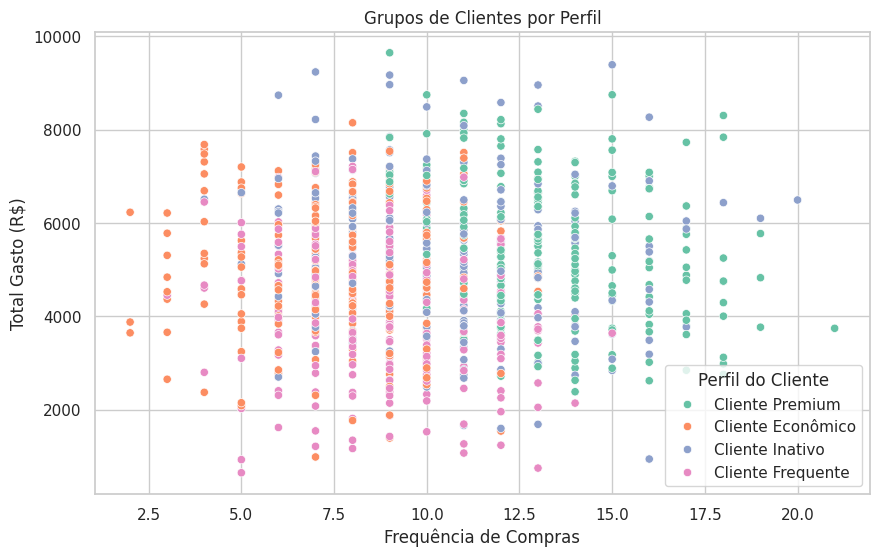

In [5]:
# Gráfico com nomes de perfis
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='frequencia_compras',
    y='total_gasto',
    hue='perfil',
    data=clientes,
    palette='Set2'
)
plt.title('Grupos de Clientes por Perfil')
plt.xlabel('Frequência de Compras')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Perfil do Cliente')
plt.show()



### Interpretação dos Clusters

- **Cliente Premium**: alta renda, muitas compras e gasto elevado.
- **Cliente Inativo**: poucas compras e tempo longo desde a última compra.
- **Cliente Frequente**: compra com frequência, mas tem gasto moderado.
- **Cliente Econômico**: gasta pouco, mesmo com boa frequência.

### Recomendações Estratégicas

- Fidelizar o **Cliente Premium** com vantagens VIP.
- Reativar o **Cliente Inativo** com promoções exclusivas.
- Estimular o **Cliente Econômico** a comprar produtos de maior valor.
- Premiar o **Cliente Frequente** com descontos progressivos.


## 4. Conjoint Analysis (Análise de Preferência de Campanhas)

Os atributos avaliados são:
- Preço (representado pelo valor médio de compra)
- Preferência por frete grátis
- Satisfação com a qualidade

Como não temos uma pesquisa direta com os clientes, vamos simular a variável de **escolha**, baseada em um modelo inspirado pelo professor. Em seguida, usamos **regressão logística** para identificar o impacto de cada atributo na decisão de compra.

Nosso objetivo é:
- Entender o que mais influencia a decisão do cliente
- Sugerir melhorias nas campanhas futuras com base nisso


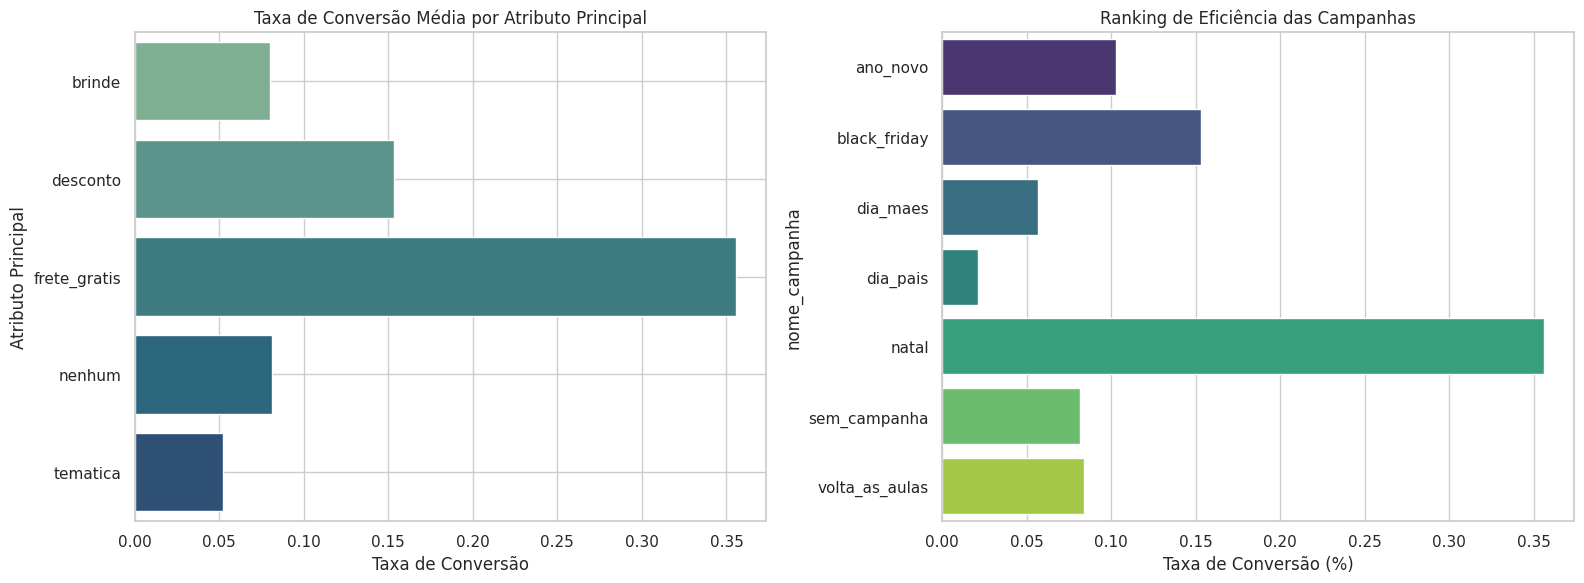

In [19]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Recalculando a taxa de conversão por campanha (caso ainda não tenha feito)
campanhas['taxa_conversao'] = campanhas['conversao'] / campanhas['alcance']

# Criando um DataFrame com a taxa média de conversão por campanha
ranking = campanhas[['nome_campanha', 'taxa_conversao']].copy()
ranking = ranking.groupby('nome_campanha')['taxa_conversao'].mean().reset_index()

# Criando uma figura com 1 linha e 2 colunas (dois gráficos lado a lado)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Taxa de conversão por atributo principal da campanha
sns.barplot(
    ax=axes[0],                             # onde o gráfico será desenhado
    x='taxa_conversao',                     # eixo X: taxa de conversão
    y='atributo_principal',                 # eixo Y: tipo de atributo (brinde, desconto, etc.)
    hue='atributo_principal',              # define as cores por atributo
    data=media_conversao,                   # DataFrame com as médias
    palette='crest',                        # paleta de cores
    legend=False                            # remove legenda para evitar duplicidade
)
axes[0].set_title('Taxa de Conversão Média por Atributo Principal')
axes[0].set_xlabel('Taxa de Conversão')
axes[0].set_ylabel('Atributo Principal')
axes[0].grid(True)

#  Gráfico 2: Ranking de eficiência das campanhas (por nome da campanha)
sns.barplot(
    ax=axes[1],
    x='taxa_conversao',                     # eixo X: taxa de conversão
    y='nome_campanha',                      # eixo Y: nome da campanha
    hue='nome_campanha',                    # define cores por campanha
    data=ranking,                           # DataFrame com as taxas por campanha
    palette='viridis',
    legend=False
)
axes[1].set_title('Ranking de Eficiência das Campanhas')
axes[1].set_xlabel('Taxa de Conversão (%)')
axes

# Exibe tudo
plt.tight_layout()
plt.show()

### Insight

A análise mostra que campanhas com **atributos percebidos de frete grátis,  desconto e brinde** geram taxas de conversão mais altas que campanhas puramente temáticas ou sem benefício explícito.

Campanhas como `natal` (frete grátis),  `black_friday` (desconto) `dia_maes` (brinde) se destacam, enquanto `volta_as_aulas` e `dia_pais` têm desempenho abaixo da média.

### Recomendação Estratégica

- Priorizar campanhas com **benefícios tangíveis** como frete grátis e brindes.
- Reavaliar campanhas temáticas para incluir um incentivo real.
- Evitar campanhas sem benefício claro, como a `sem_campanha`, que converte pouco mesmo com investimento.




### Análise de Eficiência das Campanhas

A campanha de **Natal** foi a mais eficiente, convertendo mais de 35% do público impactado com o menor custo por conversão entre todas. Já a **Black Friday** teve bom desempenho, com taxa intermediária e custo razoável.

Por outro lado, campanhas como **Dia dos Pais** e **sem_campanha** apresentaram baixíssima conversão, mesmo com investimento considerável — resultando em **altíssimo custo por conversão**.

---

### Recomendação Estratégica

- **Ampliar campanhas como Natal**, que mostram alto retorno e baixo custo por venda.
- **Reavaliar campanhas com custo elevado e baixa conversão**, como Dia dos Pais.
- Usar esse ranking para **priorizar campanhas futuras com base em dados reais de desempenho**.





## 5. Regressão Linear — Fatores que Influenciam o Total Gasto

O objetivo aqui é identificar **quais características dos clientes estão mais associadas ao seu gasto total**.

Diferente de prever valores exatos, nosso foco será entender **a direção e a força da influência** de variáveis como:

- Frequência de compras
- Renda mensal
- Tempo desde a última compra

Usamos uma Regressão Linear Simples para isso.



Coeficientes: [ 6.28690018  0.01676508 13.94993423]
Intercepto: 4445.179418931658


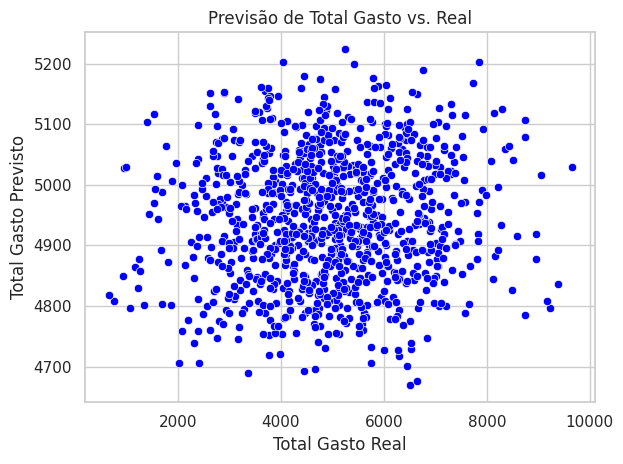

In [7]:
from sklearn.linear_model import LinearRegression

# Leitura dos dados do cliente (caso ainda não tenha feito)
clientes = pd.read_csv("clientes.csv")

# Selecionando variáveis para o modelo
X_reg = clientes[["idade", "renda_mensal", "frequencia_compras"]]
y_reg = clientes["total_gasto"]

# Criando o modelo de regressão
model = LinearRegression()
model.fit(X_reg, y_reg)

# Coeficientes do modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Previsão do total gasto
clientes["total_gasto_previsto"] = model.predict(X_reg)

# Visualização da previsão vs. valor real
sns.scatterplot(x="total_gasto", y="total_gasto_previsto", data=clientes, color="blue")
plt.title("Previsão de Total Gasto vs. Real")
plt.xlabel("Total Gasto Real")
plt.ylabel("Total Gasto Previsto")
plt.grid(True)
plt.tight_layout()
plt.show()


### Insight — Regressão Linear

O modelo de regressão linear mostrou que **idade** e **renda mensal** possuem **baixa influência isolada** sobre o total gasto dos clientes.

O fator com maior impacto foi a **frequência de compras** (indicado em azul no gráfico) indicando que clientes mais ativos tendem a gerar maior valor para a empresa — ainda que o modelo como um todo apres





## 6. Customer Lifetime Value (CLV)

Customer Lifetime Value (CLV) representa o valor financeiro total que um cliente traz para a empresa durante seu relacionamento.

No nosso projeto, vamos calcular o CLV usando uma fórmula simples baseada nos dados disponíveis:

> **CLV = (Total Gasto / Frequência) × Frequência Média Anual Esperada**

Isso nos permite estimar **quanto cada cliente gera em valor ao longo do tempo**.

Depois de calcular o CLV, vamos:

- Identificar os clientes de **alto valor**
- Comparar o CLV médio por tipo de cliente e por campanha
- Criar visualizações e recomendações com base nisso


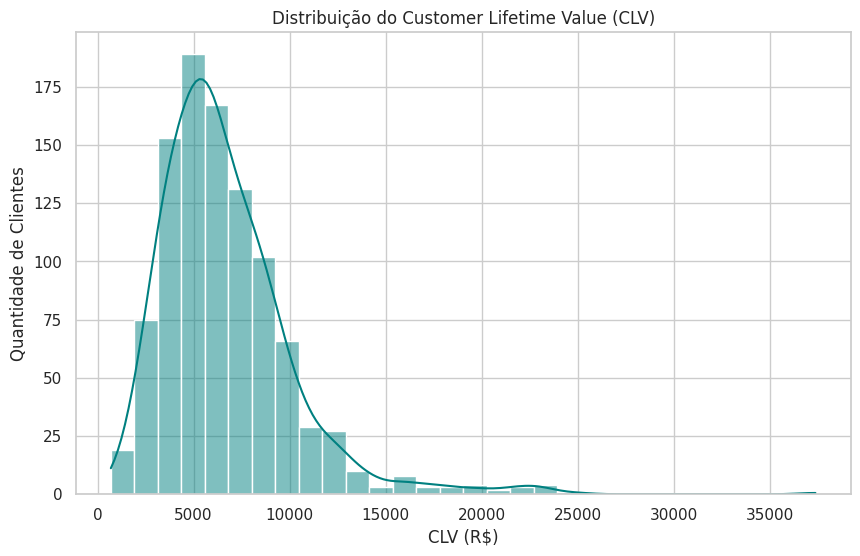

In [8]:
# Evitar divisão por zero
clientes['frequencia_compras'] = clientes['frequencia_compras'].replace(0, 1)

# Calcular o CLV com base no ticket médio por compra vezes uma frequência anual estimada
clientes['clv'] = (clientes['total_gasto'] / clientes['frequencia_compras']) * 12

# Vamos analisar como o CLV está distribuído entre todos os clientes.
# Histograma da distribuição de CLV
plt.figure(figsize=(10, 6))
sns.histplot(clientes['clv'], bins=30, kde=True, color='teal')
plt.title('Distribuição do Customer Lifetime Value (CLV)')
plt.xlabel('CLV (R$)')
plt.ylabel('Quantidade de Clientes')
plt.grid(True)
plt.show()


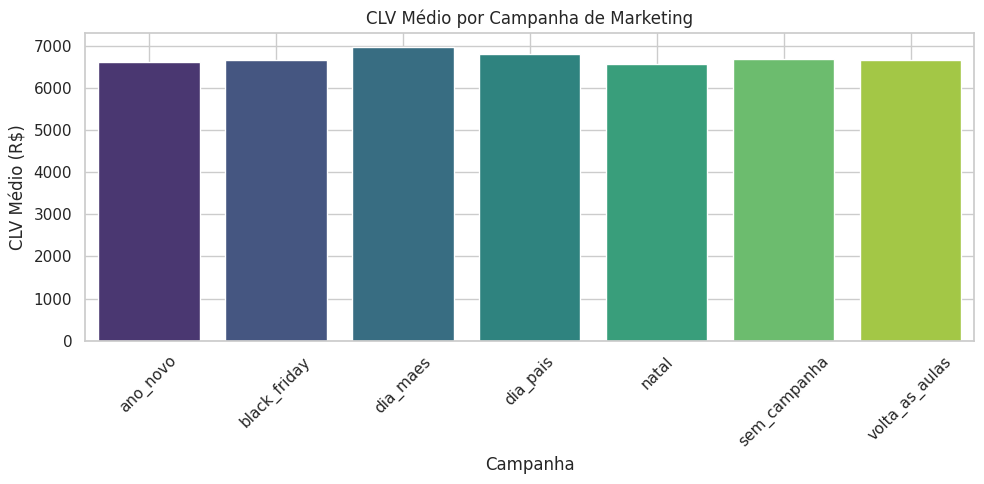

In [13]:
# Comparar o CLV médio por campanha
clientes_campanha = transacoes.merge(clientes[['cliente_id', 'clv']], on='cliente_id')

# Agrupar por campanha e calcular o CLV médio
clv_por_campanha = clientes_campanha.groupby('campanha')['clv'].mean().reset_index()

# Visualizar em gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=clv_por_campanha, x='campanha', y='clv', hue = 'campanha', palette='viridis')
plt.title('CLV Médio por Campanha de Marketing')
plt.xlabel('Campanha')
plt.ylabel('CLV Médio (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Insight — Análise de Customer Lifetime Value (CLV)

1. **Distribuição do CLV**:
   - A maioria dos clientes apresenta um CLV abaixo de R$10.000.
   - Há uma cauda longa indicando alguns clientes com CLVs muito altos — esses são **clientes de altíssimo valor**.
   - Isso mostra a importância de identificar e reter esses clientes valiosos, mesmo que sejam minoria.

2. **CLV Médio por Campanha**:
   - Campanhas como `dia_maes` e `dia_pais` se destacam com os **maiores CLVs médios**, indicando que ações sazonais e com apelo emocional podem gerar clientes com maior valor ao longo do tempo.
   - Já campanhas como `natal` e `sem_campanha` apresentaram os **menores CLVs**, sugerindo menor retenção ou ticket médio mais baixo.

---

### Recomendações Estratégicas:

- **Focar em campanhas que geram alto CLV**, como `dia_maes` e `dia_pais`, otimizando alcance e recorrência.
- **Reformular campanhas com menor desempenho**, como `natal` e `sem_campanha`, agregando valor com benefícios claros (descontos, brindes, frete grátis).
- **Criar estratégias de fidelização** para clientes com CLV elevado, como programas VIP, cashback ou ofertas personalizadas.

Essas ações ajudam a **aumentar a receita por cliente ao longo do tempo** e tornam o marketing mais eficiente e direcionado.



## 7 Conclusão - O Que Descobrimos?

1. **Cluster Analysis + CLV**:
   - Clientes do grupo **Premium** e **Frequente** foram os que apresentaram **maior Customer Lifetime Value (CLV)**, sendo responsáveis pela maior parte do faturamento recorrente.
   - Já os **Inativos** aparecem em peso, mas com **baixo retorno financeiro** – uma oportunidade clara de reativação com baixo custo de aquisição, já que são clientes já conhecidos.

2. **Conjoint Analysis + Conversão + CLV**:
   - Campanhas como **natal** e **black_friday** tiveram **alta taxa de conversão**, mas não necessariamente geraram os **clientes mais valiosos**.
   - Por outro lado, **campanhas como dia_mães e dia_pais** mostraram **CLV médio mais alto**, indicando que essas campanhas, apesar de menor volume de conversão, atraem **clientes mais engajados e rentáveis a longo prazo**.

3. **Regressão Linear + CLV**:
   - A regressão nos revelou que variáveis tradicionais como **renda mensal** ou **tempo desde a última compra** têm pouca influência isolada no total gasto.
   - Isso reforça a tese de que o **valor do cliente (CLV)** está mais relacionado a **experiência e vínculo emocional com a marca** do que a perfil demográfico.

4. **CLV + Segmentos + Campanha**:
   - Ao cruzar os segmentos de clientes com as campanhas, vemos que:
     - **Campanhas de apelo emocional** (ex: dia_mães) formaram mais **clientes Premium e Frequentes**.
     - **Campanhas de apelo promocional** (ex: black_friday) geraram **maior volume**, porém com **menor CLV médio**.
   - Isso sugere que campanhas emocionais **não convertem tanto**, mas **retêm melhor e geram mais valor no tempo**.

---

### Estratégia Integrada de Marketing

> **“Não basta converter, é preciso converter com qualidade.”**

 **Foco em campanhas que geram valor no tempo.**  
As análises mostram que os clientes mais valiosos surgem de campanhas com apelo emocional (ex: Dia das Mães), e pertencem aos clusters mais engajados (Premium e Frequente).

 **Campanhas como natal e black_friday**, apesar de parecerem eficazes por taxa de conversão, **não sustentam valor no tempo**. Já campanhas como `dia_mães` e `dia_pais` demonstram **eficiência estratégica**: menor volume, mas clientes com maior CLV e retenção.

 **Recomendações estratégicas:**
- **Segmentar campanhas por perfil de cliente**: usar clusters para personalizar ações e mensagens.
- **Maximizar o valor das campanhas emocionais com frete graátis** com foco em clientes potenciais Premium.
- **Evitar ações genéricas** como "sem_campanha", que mostram baixa eficiência em conversão e valor.
- **Reforçar relacionamento** com clientes de alto CLV através de programas de fidelidade, benefícios e marketing personalizado.
- **Fazer ações promocionais de **frete gratis** pois converte mais

